In [1]:
import os
import json
import pandas as pd

# Lists for holding all the data
real_text = []
fake_text = []

# Load all files from the dataset directory
path_to_json_real = './dataset/real_news/'
path_to_json_fake = './dataset/fake_news/'

real_json_files = [json_file for json_file in os.listdir(path_to_json_real) if json_file.endswith('.json')]
fake_json_files = [json_file for json_file in os.listdir(path_to_json_fake) if json_file.endswith('.json')]

for real_json_file in real_json_files:
    open_json = open(os.path.join(path_to_json_real, real_json_file))
    real_text.append(json.load(open_json))

for fake_json_file in fake_json_files:
    open_json = open(os.path.join(path_to_json_fake, fake_json_file))
    fake_text.append(json.load(open_json))

pd_real = pd.DataFrame.from_dict(real_text)
pd_fake = pd.DataFrame.from_dict(fake_text)

%store pd_real
%store pd_fake

Stored 'pd_real' (DataFrame)
Stored 'pd_fake' (DataFrame)


# Simple Analysis

* Analysis based on the number of likes, reposts and comments, without using natural language processing

1. Analyse real and fake news separately.

2. Get maximum, minimum, average, median for each of the parameters.

3. Plot each of the parameters.

Statistics about likes of real news
Mean: 32049.778409090908  Standard Deviation: 85879.22762397358
Maximum: 1179103  Minimum: 636  Median: 8750.0 

Statistics about likes of fake news
Mean: 1293.9418604651162  Standard Deviation: 9953.240984803202
Maximum: 145108  Minimum: 0  Median: 16.5 



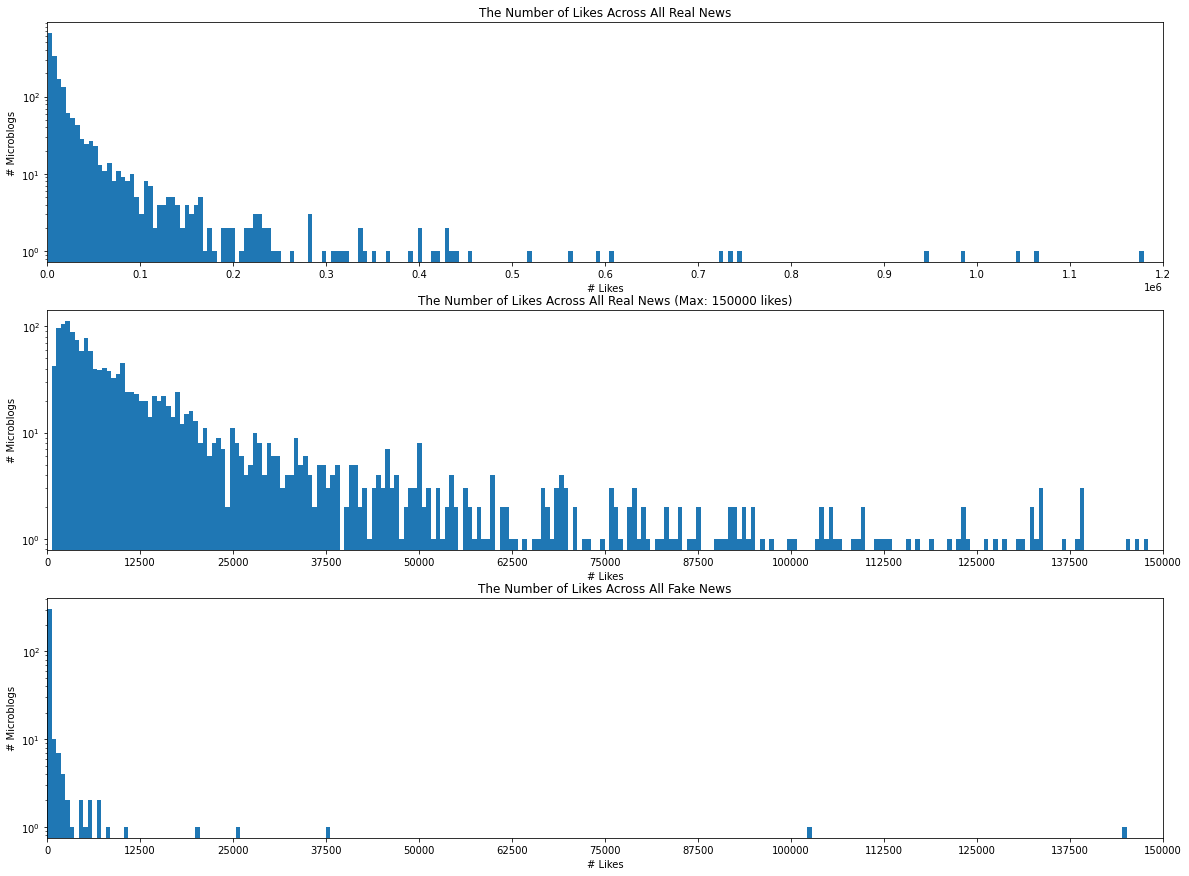

The number of fake news without likes is: 36
This accounts for 10.465116279069768 % of all fake news.

The number of fake news with fewer likes than the minimum likes of real news (636 likes) is 307
This accounts for 89.24418604651163 % of all fake news.

On average, real news have 24.769102374947817 times more likes than fake news.
On median, real news have 530.3030303030303 times more likes than fake news.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Analysing number of likes
%store -r pd_real
%store -r pd_fake

like_nums = pd_real['like_num'].astype('int')
print ("Statistics about likes of real news")
print ("Mean:", str(like_nums.mean()), " Standard Deviation:", str(like_nums.std()))
print ("Maximum:", str(like_nums.max()), " Minimum:", str(like_nums.min()), " Median:", str(like_nums.median()), "\n")


fake_like_nums = pd_fake['like_num'].astype('int')
print ("Statistics about likes of fake news")
print ("Mean:", str(fake_like_nums.mean()), " Standard Deviation:", str(fake_like_nums.std()))
print ("Maximum:", str(fake_like_nums.max()), " Minimum:", str(fake_like_nums.min()), " Median:", str(fake_like_nums.median()), "\n")


plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 1200000])
plt.xticks(np.linspace(0, 1200000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News")

# Plot real news in the range of likes of fake news
plt.subplot(3,1,2)
plt.hist(like_nums[like_nums<=150000], bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News (Max: 150000 likes)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without likes is:", str(len(fake_like_nums[fake_like_nums==0])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums==0]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer likes than the minimum likes of real news (636 likes) is", str(len(fake_like_nums[fake_like_nums<636])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums<636]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(like_nums.mean() / fake_like_nums.mean()), "times more likes than fake news.")
print ("On median, real news have", str(like_nums.median() / fake_like_nums.median()), "times more likes than fake news.\n")



Statistics about comments of real news
Mean: 2122.28125  Standard Deviation: 3810.97161752411
Maximum: 73717  Minimum: 66  Median: 993.5 

Statistics about comments of fake news
Mean: 109.7936046511628  Standard Deviation: 600.9868423534848
Maximum: 7224  Minimum: 0  Median: 10.0 



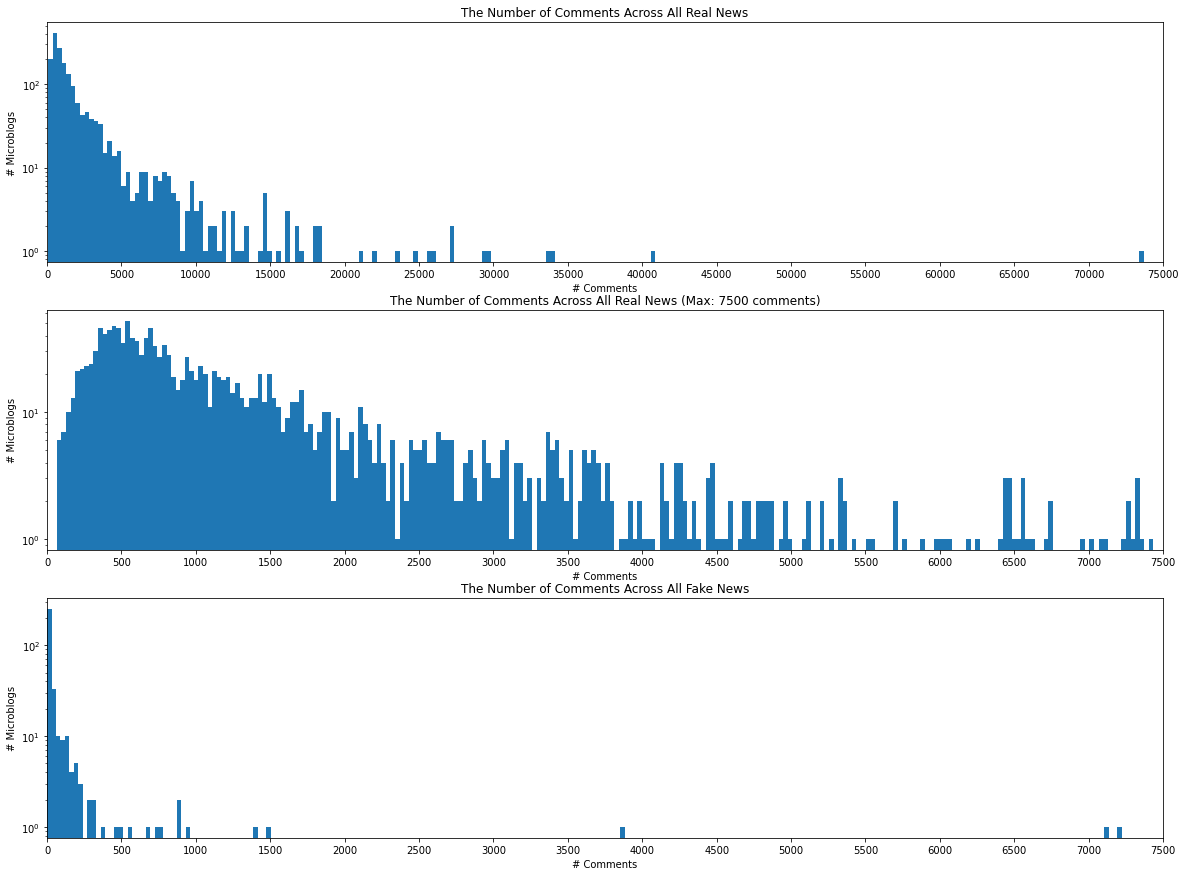

The number of fake news without comments is: 52
This accounts for 15.11627906976744 % of all fake news.

The number of fake news with fewer comments than the minimum comments of real news (66 comments) is 285
This accounts for 82.84883720930233 % of all fake news.

On average, real news have 19.32973470306336 times more comments than fake news.
On median, real news have 99.35 times more comments than fake news.



In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Analysing number of comments
%store -r pd_real
%store -r pd_fake

comment_nums = pd_real['comment_num'].astype('int')
print ("Statistics about comments of real news")
print ("Mean:", str(comment_nums.mean()), " Standard Deviation:", str(comment_nums.std()))
print ("Maximum:", str(comment_nums.max()), " Minimum:", str(comment_nums.min()), " Median:", str(comment_nums.median()), "\n")


fake_comment_nums = pd_fake['comment_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_comment_nums.mean()), " Standard Deviation:", str(fake_comment_nums.std()))
print ("Maximum:", str(fake_comment_nums.max()), " Minimum:", str(fake_comment_nums.min()), " Median:", str(fake_comment_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 75000])
plt.xticks(np.linspace(0, 75000, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(comment_nums[comment_nums<=7500], bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News (Max: 7500 comments)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without comments is:", str(len(fake_comment_nums[fake_comment_nums==0])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums==0]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer comments than the minimum comments of real news (66 comments) is", str(len(fake_comment_nums[fake_comment_nums<66])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums<66]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(comment_nums.mean() / fake_comment_nums.mean()), "times more comments than fake news.")
print ("On median, real news have", str(comment_nums.median() / fake_comment_nums.median()), "times more comments than fake news.\n")


Statistics about reposts of real news
Mean: 4142.440909090909  Standard Deviation: 53283.92636720973
Maximum: 1886915  Minimum: 82  Median: 755.0 

Statistics about comments of fake news
Mean: 162.02325581395348  Standard Deviation: 1625.2574425486048
Maximum: 27199  Minimum: 0  Median: 2.0 



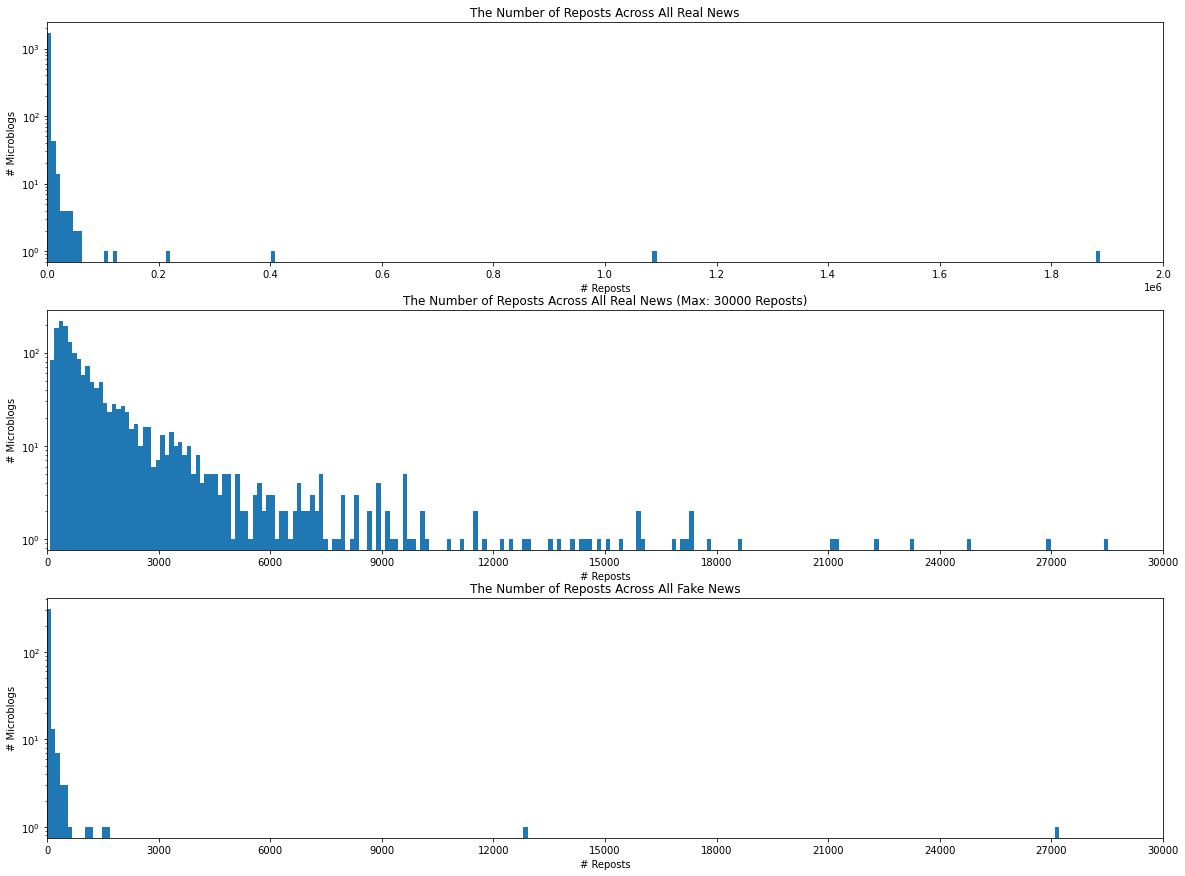

The number of fake news without reposts is: 115
This accounts for 33.43023255813954 % of all fake news.

The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is 304
This accounts for 88.37209302325581 % of all fake news.

On average, real news have 25.5669526468938 times more reposts than fake news.
On median, real news have 377.5 times more reposts than fake news.



In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Analysing number of reposts
%store -r pd_real
%store -r pd_fake

repost_nums = pd_real['repost_num'].astype('int')
print ("Statistics about reposts of real news")
print ("Mean:", str(repost_nums.mean()), " Standard Deviation:", str(repost_nums.std()))
print ("Maximum:", str(repost_nums.max()), " Minimum:", str(repost_nums.min()), " Median:", str(repost_nums.median()), "\n")


fake_repost_nums = pd_fake['repost_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_repost_nums.mean()), " Standard Deviation:", str(fake_repost_nums.std()))
print ("Maximum:", str(fake_repost_nums.max()), " Minimum:", str(fake_repost_nums.min()), " Median:", str(fake_repost_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 2000000])
plt.xticks(np.linspace(0, 2000000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(repost_nums[repost_nums<=30000], bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News (Max: 30000 Reposts)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without reposts is:", str(len(fake_repost_nums[fake_repost_nums==0])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums==0]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is", str(len(fake_repost_nums[fake_repost_nums<82])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums<82]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(repost_nums.mean() / fake_repost_nums.mean()), "times more reposts than fake news.")
print ("On median, real news have", str(repost_nums.median() / fake_repost_nums.median()), "times more reposts than fake news.\n")

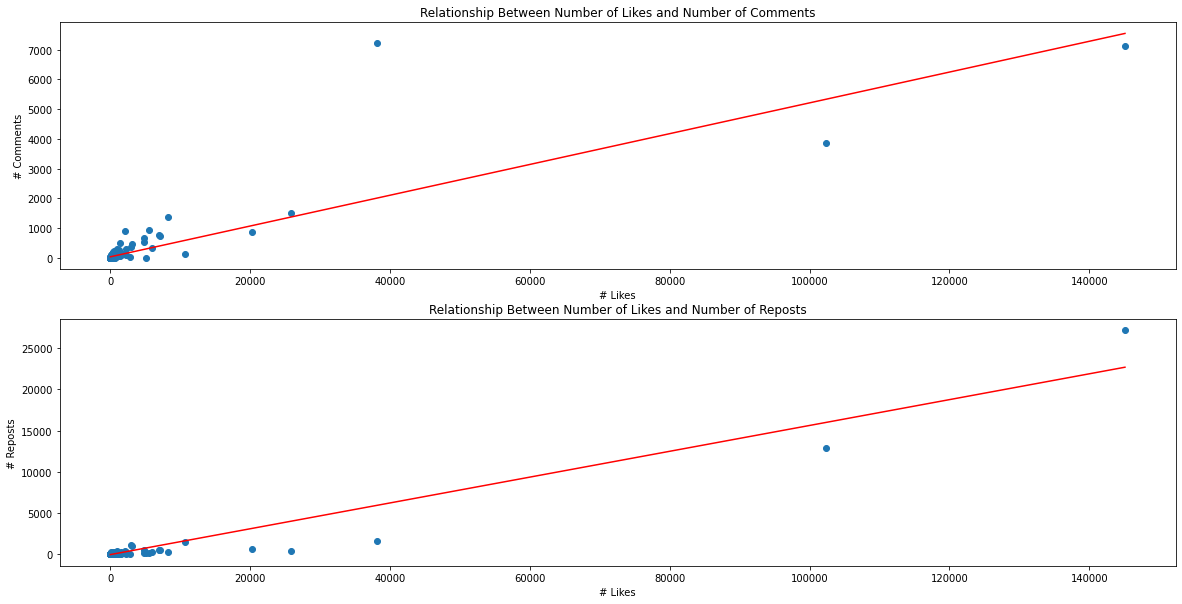

In [5]:
import matplotlib.pyplot as plt

# Plot the relationship between likes and comments/reposts
%store -r pd_fake

fake_comments = pd_fake[['like_num','comment_num','repost_num']].astype('int')
fake_comments = fake_comments.sort_values('like_num')


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.scatter(fake_comments['like_num'], fake_comments['comment_num'])
plt.xlabel('# Likes')
plt.ylabel('# Comments')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['comment_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Comments")


plt.subplot(2,1,2)
plt.scatter(fake_comments['like_num'], fake_comments['repost_num'])
plt.xlabel('# Likes')
plt.ylabel('# Reposts')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['repost_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Reposts")

plt.show()



# Analysing the Stances of the Comments of Fake News

Objective: How different topics of fake news affect the reaction of the comments of the posts

1. Summarising the posts and extracting the topics from them

In [ ]:
# Summarising fake news
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

%store -r pd_fake

# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])    # Retrieve Chinese stopwords
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove non-English, Chinese characters, or numbers
def clean_text(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"a-zA-Z0-9"
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    link_remover = re.compile(pattern="[网页|链接|视频]+", flags=re.UNICODE) # Remove the words webpage and link because they just indicate a video on the post
    new_text = link_remover.sub(r'', new_text)

    return new_text

# Extract the number of likes, text, comments, and reposts of all fake news
comments = pd_fake[['like_num','text','comments','reposts']]

# Sort fake news by the number of likes
comments = comments.astype({"like_num": int})
comments = comments.sort_values('like_num')

cleaned_posts = []

for index, row in comments.iterrows():
    text = clean_text(row['text'])
    word_flags = pseg.lcut(text)    # Separate the sentences into pairs of word and its part of speech
    words = []
    for word_flag in word_flags:
        if word_flag.flag in ['ns', 'n', 'v']:     # Only keep words that are nouns, verbs, or proper nouns
            words.append(word_flag.word)
    cleaned_posts.append(clean_stopword(words))

%store cleaned_posts
%store comments


Stored 'cleaned_posts' (list)
Stored 'comments' (DataFrame)


In [ ]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess

%store -r cleaned_posts

dictionary = gensim.corpora.Dictionary(cleaned_posts)
dictionary.filter_extremes(no_above=0.1)

# Create the corpus for the dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_posts]
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=100)
topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')

%store dictionary
%store bow_corpus
%store lda_model

pd.DataFrame(topic_dic)

# Code adapted from Chuanrong Li (https://github.com/Lichuanro/Chinese-NLP-Hands-On-Practice/blob/master/LDA/LDA.ipynb)

Stored 'dictionary' (Dictionary)
Stored 'bow_corpus' (list)
Stored 'lda_model' (LdaMulticore)


,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
0,"0.123*""女子""","0.081*""日本""","0.112*""加油""","0.120*""武汉""","0.116*""小区""","0.155*""襄阳""","0.081*""外国人""","0.062*""药物""","0.075*""开学""","0.087*""狮子""","0.078*""复工""","0.056*""医生""","0.034*""地震""","0.167*""院士""","0.072*""军舰"""
1,"0.074*""绿卡""","0.077*""试剂盒""","0.095*""总统""","0.030*""应该""","0.049*""带""","0.113*""湖北""","0.065*""起来""","0.061*""患者""","0.037*""小学""","0.074*""放""","0.073*""俄罗斯""","0.048*""全球""","0.032*""宾馆""","0.103*""钟南山""","0.061*""船"""
2,"0.067*""捐赠""","0.037*""运到""","0.089*""物资""","0.029*""没""","0.043*""发""","0.066*""酒精""","0.065*""传""","0.047*""广州""","0.022*""陆地""","0.052*""民族""","0.050*""全国""","0.045*""入""","0.032*""调入""","0.059*""屠""","0.059*""拥有"""
3,"0.067*""国籍""","0.033*""本土""","0.046*""治疗""","0.028*""发出""","0.041*""戴""","0.066*""封省""","0.042*""医生""","0.046*""治疗""","0.022*""时间""","0.052*""民众""","0.045*""发电厂""","0.042*""收入""","0.032*""遇上""","0.048*""病例""","0.057*""神山"""
4,"0.050*""获得""","0.029*""物资""","0.036*""受""","0.028*""英雄""","0.032*""越南""","0.060*""湖北省""","0.041*""重症""","0.043*""公司""","0.022*""机场""","0.049*""俄罗斯""","0.038*""性""","0.032*""意大利""","0.025*""好运""","0.044*""新增""","0.055*""雷"""
5,"0.046*""华人""","0.023*""武汉""","0.036*""想""","0.028*""看到""","0.032*""国家""","0.060*""城市""","0.041*""发""","0.038*""专利""","0.021*""市场""","0.048*""外出""","0.038*""聚集""","0.028*""奖金""","0.019*""泉州""","0.035*""南关""","0.055*""开进"""
6,"0.039*""获""","0.022*""错""","0.030*""先生""","0.026*""医护人员""","0.031*""英国""","0.043*""朋友""","0.040*""入境""","0.032*""西韦""","0.021*""国道""","0.048*""防止""","0.028*""国家""","0.028*""年收入""","0.018*""倒塌""","0.035*""钟止""","0.055*""病床"""
7,"0.035*""美""","0.022*""运输机""","0.030*""职务""","0.026*""蚊虫""","0.031*""干""","0.036*""爆炸""","0.038*""国家""","0.029*""吉利""","0.021*""公交""","0.045*""武汉""","0.027*""入境""","0.028*""专家""","0.018*""出生""","0.035*""出山""","0.053*""相当于"""
8,"0.025*""话""","0.018*""完""","0.030*""航班""","0.024*""治疗""","0.025*""上班""","0.030*""国际""","0.033*""不能""","0.028*""黑人""","0.021*""居民""","0.045*""全国""","0.022*""赤峰""","0.028*""留学""","0.017*""祭祖""","0.035*""出征""","0.051*""设施"""
9,"0.025*""希望""","0.018*""美""","0.030*""晕""","0.024*""感谢""","0.025*""要求""","0.030*""愿""","0.025*""感觉""","0.026*""豁免""","0.020*""学校""","0.039*""抗""","0.022*""山西""","0.028*""传染病""","0.017*""福建""","0.035*""年龄""","0.051*""抢救"""


In [3]:
# Show the topics we settled on
import pandas as pd

%store -r dictionary
%store -r bow_corpus
%store -r lda_model

topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')
    
pd.DataFrame(topic_dic)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
0,"0.066*""绿卡""","0.087*""药物""","0.130*""俄罗斯""","0.085*""女子""","0.099*""复工""","0.121*""开学""","0.143*""物资""","0.115*""武汉""","0.119*""院士""","0.071*""小区""","0.074*""军舰""","0.106*""武汉""","0.036*""地震""","0.043*""陆地""","0.050*""加油"""
1,"0.065*""女子""","0.060*""治疗""","0.060*""国家""","0.066*""狮子""","0.079*""全国""","0.059*""小学""","0.107*""试剂盒""","0.035*""治疗""","0.054*""钟南山""","0.049*""广州""","0.063*""船""","0.062*""总统""","0.032*""宾馆""","0.038*""广西""","0.049*""医生"""
2,"0.063*""获""","0.057*""公司""","0.054*""进行""","0.063*""国籍""","0.069*""襄阳""","0.040*""居民""","0.097*""日本""","0.028*""先生""","0.048*""酒精""","0.047*""病例""","0.063*""拥有""","0.049*""没""","0.031*""遇上""","0.036*""入境""","0.038*""全球"""
3,"0.062*""华人""","0.057*""患者""","0.043*""入境""","0.052*""放""","0.053*""发电厂""","0.036*""市场""","0.051*""运到""","0.028*""重症""","0.040*""爆炸""","0.041*""发""","0.059*""神山""","0.046*""英雄""","0.031*""调入""","0.036*""大量""","0.033*""希望"""
4,"0.048*""美""","0.054*""专利""","0.039*""官""","0.047*""获得""","0.051*""湖北""","0.034*""机场""","0.046*""本土""","0.025*""逃离""","0.036*""出征""","0.041*""黑人""","0.057*""雷""","0.045*""应该""","0.025*""好运""","0.031*""拥入""","0.031*""收入"""
5,"0.045*""捐赠""","0.045*""西韦""","0.036*""市""","0.042*""捐赠""","0.043*""聚集""","0.032*""会议""","0.031*""错""","0.025*""受""","0.032*""国际""","0.030*""封闭""","0.057*""开进""","0.036*""感谢""","0.019*""泉州""","0.031*""屠""","0.029*""蚊虫"""
6,"0.042*""看起来""","0.041*""吉利""","0.032*""冠""","0.040*""民族""","0.043*""性""","0.032*""学校""","0.031*""问题""","0.025*""不会""","0.024*""钟""","0.026*""新增""","0.055*""相当于""","0.033*""治疗""","0.018*""倒塌""","0.028*""死""","0.026*""入"""
7,"0.042*""出去""","0.037*""豁免""","0.025*""抓""","0.040*""民众""","0.029*""封省""","0.031*""继续""","0.031*""完""","0.022*""医生""","0.024*""切记""","0.026*""注意""","0.055*""病床""","0.033*""医护人员""","0.018*""出生""","0.026*""戴""","0.024*""警告"""
8,"0.040*""社区""","0.037*""德""","0.021*""人员""","0.040*""防止""","0.027*""城市""","0.030*""动车""","0.026*""美""","0.021*""警察""","0.024*""想""","0.024*""国家""","0.053*""设施""","0.030*""护士""","0.018*""四川""","0.026*""风险""","0.024*""发出"""
9,"0.035*""看看""","0.033*""分子结构""","0.018*""市政府""","0.039*""绿卡""","0.027*""赤峰""","0.030*""出行""","0.026*""运输机""","0.021*""提供""","0.023*""使用""","0.023*""带""","0.053*""抢救""","0.027*""买""","0.017*""祭祖""","0.023*""东南亚""","0.019*""奖金"""


In [1]:
# Visualise the 15 topics using LDAvis
import pyLDAvis
import pyLDAvis.gensim_models

%store -r dictionary
%store -r bow_corpus
%store -r lda_model

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared


/home/lucaslei/.local/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/home/lucaslei/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.219517  0.155557       1        1  21.637451
5     -0.266410 -0.116560       2        1   8.730068
10    -0.245773 -0.095202       3        1   8.563729
14     0.045523  0.144238       4        1   7.558009
13     0.045764 -0.080617       5        1   7.176461
4     -0.008286  0.034091       6        1   6.619309
11     0.086063  0.170387       7        1   5.382920
3      0.119702 -0.236459       8        1   5.286906
2      0.091870  0.022889       9        1   5.037268
7      0.085894  0.095429      10        1   4.910804
9      0.016443  0.002623      11        1   4.653256
1      0.000447  0.105015      12        1   4.332205
8      0.070612  0.069052      13        1   4.314497
6      0.083522 -0.088319      14        1   3.462913
0      0.094146 -0.182123      15        1   2.334205, topic_info=    Term       Freq      Total Category  logprob  loglift
155   开学  55.000000  55.000000  Default  30.0000  30.0000
205   武汉  72.000000  72.000000  Default  29.0000  29.0000
247  俄罗斯  43.000000  43.000000  Default  28.0000  28.0000
4     复工  34.000000  34.000000  Default  27.0000  27.0000
131   物资  29.000000  29.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
271   护士   0.901779  10.926705  Topic15  -4.8969   1.2629
86     市   0.901819  11.044482  Topic15  -4.8969   1.2522
99    国家   2.592768  38.374893  Topic15  -3.8408   1.0628
0     全国   1.087032  36.583579  Topic15  -4.7101   0.2414
292   广州   0.945696  15.265274  Topic15  -4.8493   0.9761

[564 rows x 6 columns], token_table=      Topic      Freq Term
term                      
309       3  0.219180   上海
309       4  0.109590   上海
309       9  0.109590   上海
309      10  0.438361   上海
28        1  0.781385   上班
...     ...       ...  ...
116       4  0.921916   高考
294      11  0.856327   黑人
294      15  0.085633   黑人
375      10  0.327494  黑人区
375      15  0.491241  黑人区

[774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 6, 11, 15, 14, 5, 12, 4, 3, 8, 10, 2, 9, 7, 1])

/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alterna

## Topic Summary: Topics that could be extracted from the results
1. (likely) About lockdown in Wuhan 
2. (likely) About thanking the medical personnel in Wuhan 
3. (likely) About cases in Wuhan
4. (likely) About the border in Guangxi province 
5. (likely) About patent of the drug 
6. (likely) About top medical expert in the country, Zhong Nanshan 
7. (likely) About the salary of doctors 
8. (highly likely) About cases in Guangzhou's black community 
9. (highly likely) About Japan's testing kit 
10. (highly likely) About Russia and lions 
11. (definitely) About a person who's been through earthquakes and the pandemic 
12. (definitely) About a woman trying to obtain a USA green card by donating masks 
13. (definitely) About battleships with medical facilities on them in the USA 
14. (definitely) About returning to work 
15. (definitely) About returning to elementary school 
* Topics are quite specific, which show that they are reposted quite a lot
* Some topics are contaminated in the results by other keywords, which may contain maore latent topics
* Could have used Non-Negative Matric Factorisation (NMF) to obtain topics as well

In [1]:
# Assign a topic to each post
from operator import itemgetter

%store -r bow_corpus
%store -r lda_model

# get a list of probabilities of being a topic for each post
topic_prob = [lda_model.get_document_topics(item) for item in bow_corpus]

# extract the maximum probability for each of them
topics = []
for prob in topic_prob:
    topic = max(prob, key=itemgetter(1))[0]
    topics.append(topic)

print (topics)

%store topics

[4, 3, 14, 12, 12, 2, 4, 12, 3, 12, 9, 14, 3, 4, 2, 5, 5, 8, 14, 12, 10, 10, 5, 4, 5, 10, 14, 12, 14, 12, 6, 14, 5, 12, 0, 0, 7, 14, 0, 13, 3, 13, 5, 9, 12, 4, 14, 3, 8, 3, 4, 4, 3, 11, 0, 14, 9, 14, 5, 13, 5, 5, 5, 3, 12, 10, 4, 5, 6, 10, 0, 0, 14, 3, 8, 13, 4, 11, 9, 4, 8, 10, 0, 7, 0, 4, 8, 14, 13, 3, 10, 1, 0, 6, 0, 8, 12, 3, 8, 3, 4, 9, 6, 12, 6, 4, 5, 6, 12, 14, 4, 7, 14, 10, 11, 7, 9, 2, 11, 8, 7, 9, 10, 4, 11, 5, 1, 12, 4, 13, 7, 11, 7, 10, 10, 10, 8, 7, 4, 11, 12, 1, 11, 12, 6, 7, 0, 10, 14, 4, 5, 10, 4, 14, 4, 7, 11, 13, 10, 2, 3, 12, 11, 10, 4, 6, 2, 4, 14, 7, 9, 6, 8, 12, 4, 10, 13, 10, 13, 4, 8, 9, 8, 7, 9, 1, 5, 6, 4, 7, 10, 2, 9, 11, 13, 9, 3, 9, 3, 1, 10, 1, 14, 4, 10, 7, 10, 8, 0, 11, 10, 2, 1, 9, 8, 11, 2, 1, 0, 7, 7, 10, 8, 7, 7, 4, 0, 0, 11, 1, 0, 4, 3, 2, 8, 12, 7, 9, 13, 8, 1, 10, 3, 0, 8, 1, 7, 3, 1, 0, 7, 7, 0, 8, 3, 9, 9, 2, 0, 0, 11, 3, 9, 9, 8, 12, 9, 3, 7, 1, 7, 5, 2, 4, 3, 13, 0, 2, 10, 3, 9, 14, 13, 13, 10, 2, 7, 14, 9, 10, 6, 7, 1, 8, 3, 6, 8, 2, 9, 8, 3,

/home/lucaslei/.local/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


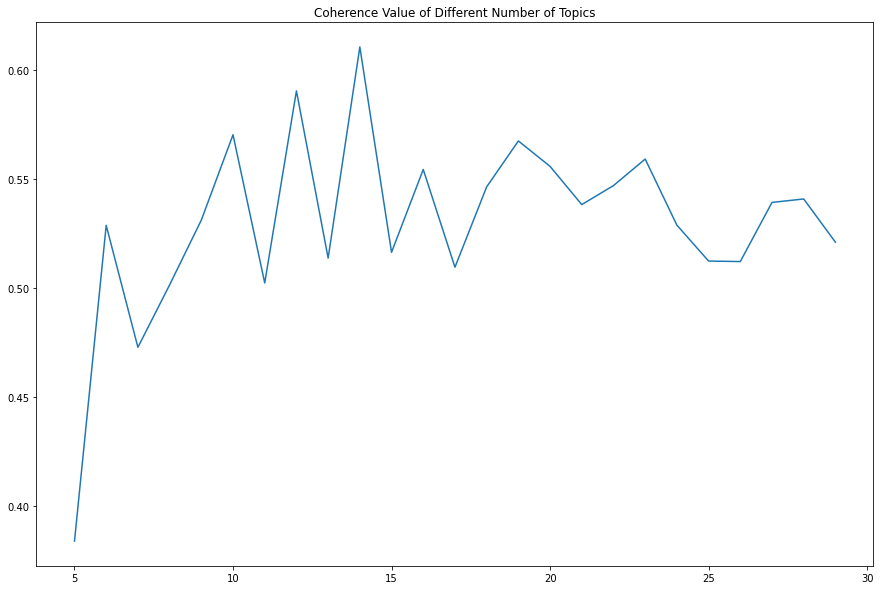

In [ ]:
# Check the coherence and perplexity of the topics
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

%store -r dictionary
%store -r bow_corpus
%store -r cleaned_posts

coherence = []
for i in range(5,30):
    lda_test = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=100)
    coherence_model_lda = CoherenceModel(model=lda_test, texts=cleaned_posts, dictionary=dictionary, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())

plt.figure(figsize=(15,10))
plt.plot([i for i in range(5,30)], coherence)
plt.title("Coherence Value of Different Number of Topics")

plt.show()

* Peak at around 15 topics
* General sawtooth shape

2. Training a word2vec model to transform all the comments into word vectors

# Training a word2vec model
1. Preprocess the comments of the real and fake news
2. Use a pre-established corpus
3. Add to the corpus all the comments
4. Train a word2vec model based on the combined data

In [4]:
# Preprocess the comments of fake news
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

%store -r comments

# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])    # Retrieve Chinese stopwords
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove non-English, Chinese characters, or numbers
def clean_comment(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"a-zA-Z0-9"
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    rubbish_remover = re.compile(pattern="^:[快转|转发|微博]+", flags=re.UNICODE) # Remove the colon and generic comment texts
    new_text = rubbish_remover.sub(r'', new_text)

    return new_text

all_cleaned_fake_comments = []

for index, row in comments.iterrows():  # For every fake news
    all_comments = row['comments']
    if all_comments == []:     # If no comments on the post
        all_cleaned_fake_comments.append([])    # Append an empty list to indicate the corresponding post has no comments
    else:
        cleaned_comments = []
        for comment_info in all_comments:   # For every comment on the post
            comment = clean_comment(comment_info['text'])   # First layer of filtering by cleaning the unnecessary rubbish
            if comment != []:  # Only separate the comment if it is not empty after cleaning the words
                word_flags = pseg.lcut(comment)
                cleaned_comment = []
                for word_flag in word_flags:
                    if word_flag.flag in ['ns', 'n', 'v', 'a']:     # Keep adjective as well because that usually shows emotion
                        cleaned_comment.append(word_flag.word)
                cleaned_comments.append(clean_stopword(cleaned_comment))    # Remove stopwords
        all_cleaned_fake_comments.append(cleaned_comments)

# Number of fake comments: 16456

%store all_cleaned_fake_comments

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.435 seconds.
Prefix dict has been built successfully.


Stored 'all_cleaned_fake_comments' (list)


In [6]:
%store -r all_cleaned_fake_comments

f = open("fake_comments.txt", "w")

for post_comments in all_cleaned_fake_comments:
    if not post_comments == []:
        for line in post_comments:
            for word in line:
                f.write(word + " ")
            f.write("\n")

f.close()

In [7]:
# Preprocess the comments of real news
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

%store -r pd_real

real_comments = pd_real['comments']

# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])    # Retrieve Chinese stopwords
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove non-English, Chinese characters, or numbers
def clean_comment(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"a-zA-Z0-9"
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    rubbish_remover = re.compile(pattern="^:[快转|转发|微博]+", flags=re.UNICODE) # Remove the colon and generic comment texts
    new_text = rubbish_remover.sub(r'', new_text)

    return new_text

cleaned_real_comments = []

for row in real_comments:  # For every real news
    if not row == []:     # If there are comments on the post
        for comment_info in row:   # For every comment on the post
            comment = clean_comment(comment_info['text'])   # First layer of filtering by cleaning the unnecessary rubbish
            if comment != []:  # Only separate the comment if it is not empty after cleaning the words
                word_flags = pseg.lcut(comment)
                cleaned_real_comment = []
                for word_flag in word_flags:
                    if word_flag.flag in ['ns', 'n', 'v', 'a']:     # Keep adjective as well because that usually shows emotion
                        cleaned_real_comment.append(word_flag.word)
                cleaned_real_comments.append(clean_stopword(cleaned_real_comment))    # Remove stopwords

# Number of real comments: 1169245

%store cleaned_real_comments


Stored 'cleaned_real_comments' (list)


In [8]:
# Write the real comments to a file

%store -r cleaned_real_comments

f = open("comments.txt", "w")

for line in cleaned_real_comments:
    for word in line:
        f.write(word + " ")
    f.write("\n")

f.close()


## Following the guide provided here 
### https://www.big-meter.com/opensource/en/5fff0c3f7e137017d35433f9.html
* The Chinese Wikipedia corpus has over 3.5m+ articles
1. Extracted around 410k articles after pruning ones that have fewer than 50 words

2. Translated all the articles into simplified Chinese

3. Removed all the English words and blanks from the articles

4. Segmented all the articles using Jieba

2.5. Bringing in the annotated texts from NLPCC to add to the word2vec model

* The dataset from the NLPCC2016 Task 4A will be used (http://tcci.ccf.org.cn/conference/2016/pages/page05_evadata.html)
* The dataset contains stances of microblogs around 5 topics

In [5]:
# Pre-process the text file

import pandas as pd

f = open("./NLPCC2016_Stance_Detection_Dataset/evasampledata4-TaskAA.txt", "r")

svm_train = []
for line in f:
    stance = []
    entry = line.split()
    text = ' '.join(entry[2:-1])   # Put the fragmented comment together
    stance.extend(entry[0:2])
    stance.append(text)
    stance.append(entry[-1])
    svm_train.append(stance)

f.close()

svm_train = pd.DataFrame(svm_train[1:], columns=svm_train[0])

X = svm_train['TEXT'].values
Y = svm_train['STANCE'].values

%store X
%store Y


Stored 'X' (ndarray)
Stored 'Y' (ndarray)


In [9]:
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

%store -r X



# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])    # Retrieve Chinese stopwords
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove non-English, Chinese characters, or numbers
def clean_comment(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        "]+"
        , flags=re.UNICODE)
    new_text = text_cleaner.sub(r'', text)  # Replace all characters that does not fit the above the regular expression

    rubbish_remover = re.compile(pattern="^:[快转|转发|微博]+", flags=re.UNICODE) # Remove the colon and generic comment texts
    new_text = rubbish_remover.sub(r'', new_text)

    return new_text

cleaned_texts = []

for text in X:  # For every text in the dataset
    split_text = clean_comment(text)   # First layer of filtering by cleaning the unnecessary rubbish
    word_flags = pseg.lcut(split_text)
    cleaned_text = []
    for word_flag in word_flags:
        if word_flag.flag in ['ns', 'n', 'v', 'a']:     # Keep adjective as well because that usually shows emotion
            cleaned_text.append(word_flag.word)
    cleaned_texts.append(clean_stopword(cleaned_text))    # Remove stopwords
    

%store cleaned_texts

Stored 'cleaned_texts' (list)


In [10]:
# Write the texts to a file

%store -r cleaned_texts

f = open("texts.txt", "w")

for line in cleaned_texts:
    for word in line:
        f.write(word + " ")
    f.write("\n")

f.close()

* Better to combine as many text files as possible together and then create a model rather than creating two separate models first
    * Different models in different vector spaces, so difficult to convert
    * More texts generally translate to higher accuracy

In [2]:
# Training a Word2Vec model with the combined texts

import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

model = Word2Vec(LineSentence("./combined.txt"), vector_size=400, window=5, min_count=5, workers=multiprocessing.cpu_count())

model.save("combined.model")
model.wv.save_word2vec_format("combined.vectors", binary=False)

* CBOW (Continuous Bag-of-Words) was used
* window (int, optional) – Maximum distance between the current and predicted word within a sentence.
* BERT by Google is a powerful encoder representation and is used more often since it can predict next sentence as well if given one
* BERT can provide contextualised embedding according to the sentence even for the same word
* https://github.com/ymcui/Chinese-BERT-wwm There exists a pre-trained Chinese BERT model using Whole Word Masking (WWM)
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8432858/ BERTtoCNN: an article using pre-trained BERT to train a CNN for Chinese comment stance detection

3. Using the combined model on some keywords to test it out

In [1]:
import gensim

load_model = gensim.models.Word2Vec.load("./combined.model")

test_words = ["举报", "消息", "新闻", "新增", "新冠", "疫苗", "武汉", "隔离", "钟南山", "开学"]

for word in test_words:
    similar_words = load_model.wv.most_similar(positive=[word], topn=10)
    for word in similar_words:
        print ("Word: " + word[0] + "  Probability: " + str(word[1]))
    print ()

Word: 检举  Probability: 0.7205923795700073
Word: 投诉  Probability: 0.6481166481971741
Word: 上访  Probability: 0.6260196566581726
Word: 发帖  Probability: 0.6130148768424988
Word: 查处  Probability: 0.6040003299713135
Word: 刑拘  Probability: 0.5982154011726379
Word: 行贿  Probability: 0.5894303917884827
Word: 举发  Probability: 0.5894231796264648
Word: 刑事拘留  Probability: 0.5865178108215332
Word: 举报信  Probability: 0.578585147857666

Word: 死讯  Probability: 0.6081995368003845
Word: 讯息  Probability: 0.5815300345420837
Word: 传言  Probability: 0.572083592414856
Word: 假消息  Probability: 0.5427318215370178
Word: 谣言  Probability: 0.5406032800674438
Word: 报道  Probability: 0.5309467911720276
Word: 传闻  Probability: 0.5255840420722961
Word: 声明  Probability: 0.5102773308753967
Word: 最新消息  Probability: 0.5079454779624939
Word: 噩耗  Probability: 0.5073633193969727

Word: 新闻节目  Probability: 0.6485896110534668
Word: 体育新闻  Probability: 0.6303747892379761
Word: 新闻台  Probability: 0.6204481720924377
Word: 电视新闻  Probability

* Tested the model by investigating the most similar words of a given word
* The most similar words are closely related semantically but for some of the test words, we observed that the added comments to create the model had influenced some of the similar words
* For example:
    1. the word "新增" (New) is now closely related to the word "疑似病例" (Suspected case (Medical))
    2. the word "疫苗" (Vaccine) is now closely related to the word "辉瑞" (Pfizer)

4. Building an SVM model using texts from the NLPCC 2016 task

* The texts were already brought in in section 2.5 to build the word2vec model

* Simply averaging the word vectors would "[lose] the word order in the same way as the standard bag-of-words models do" and "fail to recognize many sophisticated linguistic phenomena, for instance sarcasm" (https://cs.stanford.edu/~quocle/paragraph_vector.pdf)
* Slightly better approach is to average the word vectors while taking into account their TF-IDF (term frequency–inverse document frequency) (https://aclanthology.org/P16-1089.pdf), so the more important words are emphasised
* An even better approach would be to combine word vectors in an order given by a parse tree of the sentence (https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf). However, this is unrealistic since we do not have the parse trees for the entries in the dataset

* The second article above also provided viable alternatives to averaging word vectors with TF-IDF
* https://aclanthology.org/P16-1089.pdf introduces Siamese CBoW where the authors added another cosine layer to find the similarity between pairs of sentences and Softmax is used to produce the final probability distribution
* This method can create a word embedding model that is optimized for sentence representations, which can be obtained by directly averaging the word vectors.

In [1]:
# Transform the word embeddings into sentence embeddings
# Remove the labels where the texts have been cleaned

import gensim
import math
import numpy as np
from collections import Counter

%store -r cleaned_texts
%store -r Y

load_model = gensim.models.Word2Vec.load("./combined.model")

# Calculate the Inverse Document Frequence
def calc_idf(word, list_of_lists):   
    count = 0
    for entry in list_of_lists:
        if word in entry:
            count = count + 1
    return count, math.log(len(list_of_lists)/(count+1), 2)  # +1 in the denominator to smooth the value 

sentences_vecs = []
Y_true = []
for index, text in enumerate(cleaned_texts):
    if not text == []:
        words_freq = Counter(text)
        sentence_vec = np.zeros(400)
        valid_word = 0   # Number of valid words (appear more than 5 times across all documents) in the text
        for word in words_freq:
            tf = words_freq[word] / len(text)    # Term Frequency
            count, idf = calc_idf(word, cleaned_texts)    # count of word and its IDF
            if count >= 5:   # only calculate the vector if it appears more than or equal to 5 times, since min_count in word2vec is 5
                valid_word = valid_word + 1
                weighted_vec = load_model.wv[word] * tf * idf   # Weighted word vector
                sentence_vec = np.add(sentence_vec, weighted_vec)
        if valid_word > 0:
            sentence_vec = sentence_vec / valid_word   # Average the word vectors with TF-IDF
            sentences_vecs.append(sentence_vec)
            Y_true.append(Y[index])   # Only add the label if the sentence embedding is valid

print ("The number of sentences in the dataset:", len(sentences_vecs))
%store sentences_vecs
%store Y_true

The number of sentences in the dataset: 2962
Stored 'sentences_vecs' (list)
Stored 'Y_true' (list)


* Alternatively, we could have used just transformed each entry in the text file into a vector
* Some tools such as Sentence-BERT and InferSent do not support the creation of Chinese sentence vectors
* Doc2Vec with DBoW (Distributed Bag of Words) provided by gensim was considered
    (https://medium.datadriveninvestor.com/from-word-embeddings-to-sentence-embeddings-part-2-3-21a5b03592a1#:~:text=Sentence%20embeddings%20are%20similar%20to,similar%20embeddings%20for%20similar%20sentences.)
* We decided against it because some comments are very short and sometimes just contain one or two words, so the output vectors may not be accurate. Moreover, it would have taken much longer to establish a model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib
import numpy as np


%store -r sentences_vecs
%store -r Y_true

for index, label in enumerate(Y_true):
    if not (label == 'NONE' or label == 'FAVOR' or label == 'AGAINST'):   # Labels missing from the original texts
        Y_true[index] = 'NONE'    # Assign a 'NONE' label to each of these posts

X_train, X_test, y_train, y_test = train_test_split(sentences_vecs, Y_true, test_size=0.2, random_state=42)


# Use SVC for multi-class classifying
# Set the decision function shape to "ovr" (one-vs-rest) to return a classifier for each label instead of pairwise classifiers
# Set probability to True to enable probabilistic classification
svm_clf = svm.SVC(decision_function_shape="ovr", probability=True)
svm_clf.fit(X_train, y_train)

print ("Accuracy of the SVM model:", svm_clf.score(X_test, y_test))


# Try random forest next
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

print ("Accuracy of the Random Forest model:", rf.score(X_test, y_test))


# Try GDBT finally
# default learning_rate=0.1, max_depth=3
gbdt = GradientBoostingClassifier(n_estimators=500, random_state=42)
gbdt.fit(X_train, y_train)

print ("Accuracy of the GBDT model:", gbdt.score(X_test, y_test))


# Combining the three models by using the prediction probabilities

#TODO
svm_pred_prob = np.array(svm_clf.predict_proba(X_test))
rf_pred_prob = np.array(rf.predict_proba(X_test))
gbdt_pred_prob = np.array(gbdt.predict_proba(X_test))

final_pred_prob = (svm_pred_prob + rf_pred_prob + gbdt_pred_prob) / 3

final_y_predict = []
for pred_prob in final_pred_prob:
    max_prob = np.amax(pred_prob)   # Find the maximum of each array
    max_prob_index = np.where(pred_prob == max_prob)[0]   # Get the index of the maximum probability
    final_y_predict.append(svm_clf.classes_[max_prob_index])    # Map the index back to a class label

        
print ("Accuracy of the final model:", accuracy_score(y_test, final_y_predict))
       

svm_file = "svm.pkl"
rf_file = "rf.pkl"
gbdt_file = "gbdt.pkl"
joblib.dump(svm_clf, svm_file)
joblib.dump(rf, rf_file)
joblib.dump(gbdt, gbdt_file)


Accuracy of the SVM model: 0.49072512647554806
Accuracy of the Random Forest model: 0.524451939291737
Accuracy of the GBDT model: 0.5362563237774031
Accuracy of the final model: 0.5497470489038786


['gbdt.pkl']

* Better to train the model using annotated comments (e.g. Comments of real news)

In [34]:
# Use it on comments of fake news

# Transform the word embeddings into sentence embeddings
# Remove the labels where the texts have been cleaned

import gensim
import math
import numpy as np
from collections import Counter
import joblib

%store -r all_cleaned_fake_comments

load_model = gensim.models.Word2Vec.load("./combined.model")

svm = joblib.load('./svm.pkl')
rf = joblib.load('./rf.pkl')
gbdt = joblib.load('./gbdt.pkl')

temp_fake_comments = []
for comments in all_cleaned_fake_comments:
    if not comments == []:
        for comment in comments:
            temp_fake_comments.append(comment)

# Calculate the Inverse Document Frequence
def calc_idf(word, list_of_lists):   
    count = 0
    for entry in list_of_lists:
        if word in entry:
            count = count + 1
    return count, math.log(len(list_of_lists)/(count+1), 2)  # +1 in the denominator to smooth the value 

# Finding the stance of a comment by combining the prediction of three models
def find_stance(sentence_vec):
    svm_pred_prob = np.array(svm.predict_proba([sentence_vec]))
    rf_pred_prob = np.array(rf.predict_proba([sentence_vec]))
    gbdt_pred_prob = np.array(gbdt.predict_proba([sentence_vec]))

    final_pred_prob = (svm_pred_prob + rf_pred_prob + gbdt_pred_prob) / 3

    max_prob = np.amax(final_pred_prob[0])   # Find the maximum of the array
    max_prob_index = np.where(final_pred_prob[0] == max_prob)[0][0]   # Get the index of the maximum probability
    label = svm.classes_[max_prob_index]    # Map the index back to a class label
    return label

all_fake_comments_stances = []

for index, comments in enumerate(all_cleaned_fake_comments):
    if comments == []:     # If no comments on the post
        all_fake_comments_stances.append([])
    else:
        comments_stances = []
        for comment in comments:
            words_freq = Counter(comment)
            sentence_vec = np.zeros(400)
            valid_word = 0   # Number of valid words (appear more than 5 times across all documents) in the text
            for word in words_freq:
                tf = words_freq[word] / len(comment)    # Term Frequency
                count, idf = calc_idf(word, temp_fake_comments)    # count of word and its IDF
                if count >= 5:   # only calculate the vector if it appears more than or equal to 5 times, since min_count in word2vec is 5
                    valid_word = valid_word + 1
                    weighted_vec = load_model.wv[word] * tf * idf   # Weighted word vector
                    sentence_vec = np.add(sentence_vec, weighted_vec)
            if valid_word > 0:
                sentence_vec = sentence_vec / valid_word   # Average the word vectors with TF-IDF
                stance_pred = find_stance(sentence_vec)
                comments_stances.append(stance_pred)   # Append the stance to the comment
        all_fake_comments_stances.append(comments_stances)
            
            
%store all_fake_comments_stances


Stored 'all_fake_comments_stances' (list)


In [ ]:
# Evaluate the model by annotating the comments

5. Finding the correlation between topics and the stances of comments of fake news

In [12]:
# Literally just compare

%store -r topics
%store -r all_fake_comments_stances
%store -r all_cleaned_fake_comments

print (topics)
print (all_fake_comments_stances[3][0])
print (all_cleaned_fake_comments[3][0], all_fake_comments_stances[3][0])

[4, 3, 14, 12, 12, 2, 4, 12, 3, 12, 9, 14, 3, 4, 2, 5, 5, 8, 14, 12, 10, 10, 5, 4, 5, 10, 14, 12, 14, 12, 6, 14, 5, 12, 0, 0, 7, 14, 0, 13, 3, 13, 5, 9, 12, 4, 14, 3, 8, 3, 4, 4, 3, 11, 0, 14, 9, 14, 5, 13, 5, 5, 5, 3, 12, 10, 4, 5, 6, 10, 0, 0, 14, 3, 8, 13, 4, 11, 9, 4, 8, 10, 0, 7, 0, 4, 8, 14, 13, 3, 10, 1, 0, 6, 0, 8, 12, 3, 8, 3, 4, 9, 6, 12, 6, 4, 5, 6, 12, 14, 4, 7, 14, 10, 11, 7, 9, 2, 11, 8, 7, 9, 10, 4, 11, 5, 1, 12, 4, 13, 7, 11, 7, 10, 10, 10, 8, 7, 4, 11, 12, 1, 11, 12, 6, 7, 0, 10, 14, 4, 5, 10, 4, 14, 4, 7, 11, 13, 10, 2, 3, 12, 11, 10, 4, 6, 2, 4, 14, 7, 9, 6, 8, 12, 4, 10, 13, 10, 13, 4, 8, 9, 8, 7, 9, 1, 5, 6, 4, 7, 10, 2, 9, 11, 13, 9, 3, 9, 3, 1, 10, 1, 14, 4, 10, 7, 10, 8, 0, 11, 10, 2, 1, 9, 8, 11, 2, 1, 0, 7, 7, 10, 8, 7, 7, 4, 0, 0, 11, 1, 0, 4, 3, 2, 8, 12, 7, 9, 13, 8, 1, 10, 3, 0, 8, 1, 7, 3, 1, 0, 7, 7, 0, 8, 3, 9, 9, 2, 0, 0, 11, 3, 9, 9, 8, 12, 9, 3, 7, 1, 7, 5, 2, 4, 3, 13, 0, 2, 10, 3, 9, 14, 13, 13, 10, 2, 7, 14, 9, 10, 6, 7, 1, 8, 3, 6, 8, 2, 9, 8, 3,